> Reference link: [basic use of linearRegression function in sklearn](https://hleecaster.com/ml-linear-regression-example/), [R-squared](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4678365/), [Regression analysis](http://www.sthda.com/english/articles/40-regression-analysis/164-interaction-effect-in-multiple-regression-essentials/)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("precision", 2) # number precision for pandas
# pd.set_option("display.max_rows", 10)
pd.set_option("display.float_format", "{:20,.2f}".format) # display float values to two decimal places
plt.style.use("seaborn") # pretty matplotlib plots

# To display print all the interactive output, not only the last result.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1 Data Selection and Filtering

In [2]:
# load datasets

Laptop_df = pd.read_csv("../datasets/2022_March_LaptopData_India.csv")
Laptop_df.head(5)

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,ASUS,Celeron,Intel,Celeron Dual,Missing,4,DDR4,0,1024,Windows,...,15.6,1,No,No,23990,26990,11,3.80,15279,1947
1,ASUS,VivoBook,Intel,Core i3,10th,8,DDR4,512,0,Windows,...,15.6,1,No,No,37990,50990,25,4.30,990,108
2,ASUS,Vivobook,Intel,Core i3,10th,8,DDR4,0,1024,Windows,...,14.1,1,No,No,32890,46990,30,3.90,28,4
3,HP,Core,Intel,Core i3,11th,8,DDR4,512,0,Windows,...,15.6,1,No,Yes,42990,57330,25,4.40,158,18
4,HP,Core,Intel,Core i5,11th,8,DDR4,512,0,Windows,...,15.6,0,No,No,54990,70171,21,4.20,116,15


> [reference data link from kaggle](https://www.kaggle.com/datasets/kuchhbhi/2022-march-laptop-data?select=Cleaned_Laptop_data.csv)
### Each column means
Dataset has a total of 23 columns. But I didn't write columns that could be understood easily.
* brand: Name of Manufacturer company
* model: Model of laptop
* processor_brand: The name of the processor brand
* processor_gnrtn: Generation of processor
* ram_gb: RAM capacity installed in laptop
* ram_type: type of RAM
* ssd: SSD capacity in GB
* hhd: HDD capacity in GB
* weight: thinNight, casual, heavy(gaming)
* warranty: (measure: year)
* msoffice: pre-installed or not
* latest_price: (measure: INR), INR is the Indian Rupee, which is The Republic of India's official currency.
* old_price: The actual price of the laptop, in INRs
* discount: (measure: %)
* star_rating: The evaluation score. It represents what the score is out of a total of 5.
* ratings: The number of evaluations related to a star_rating column
* reviews: The number of reviews written by the end-user

In this analysis, I'll predict the old_price(Actual price), not a latest_price.

In [3]:
# Remove several columns 

Laptop_df = Laptop_df.drop(["processor_gnrtn", "ram_type", "os", "os_bit", "warranty", 
                            "latest_price", "discount"], axis = 1, inplace = False)
Laptop_df.head(100) # test

,brand,model,processor_brand,processor_name,ram_gb,ssd,hdd,graphic_card_gb,weight,display_size,Touchscreen,msoffice,old_price,star_rating,ratings,reviews
0,ASUS,Celeron,Intel,Celeron Dual,4,0,1024,0,Casual,15.6,No,No,26990,3.80,15279,1947
1,ASUS,VivoBook,Intel,Core i3,8,512,0,0,Casual,15.6,No,No,50990,4.30,990,108
2,ASUS,Vivobook,Intel,Core i3,8,0,1024,0,Casual,14.1,No,No,46990,3.90,28,4
3,HP,Core,Intel,Core i3,8,512,0,0,ThinNlight,15.6,No,Yes,57330,4.40,158,18
4,HP,Core,Intel,Core i5,8,512,0,0,ThinNlight,15.6,No,No,70171,4.20,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,APPLE,2020,Apple,M1 Processor,8,512,0,0,Casual,13.3,No,No,142900,4.60,399,45
96,ASUS,VivoBook,Intel,Core i3,8,256,0,0,Casual,15.6,No,No,58990,4.50,816,147
97,MSI,GF63,Intel,Core i5,8,512,0,4,Casual,15.6,No,No,83990,4.50,1597,228
98,MSI,Katana,Intel,i7,NaN,0,0,4,Casual,0,No,No,117990,4.50,218,27


In [4]:
# Exchange INR into dollars
# In 2022, April 22th, 1 INR = 0.013 dollars

# Exchange INR into dollars
Laptop_df["old_price"] = Laptop_df["old_price"] * 0.013

# Revise measure 1 dollar to 100 dollars because, 
# after doing Linear Regression, coefficient and intercept values are too high.
Laptop_df["old_price"] = Laptop_df["old_price"] / 100
Laptop_df["old_price"]

0                     3.51
1                     6.63
2                     6.11
3                     7.45
4                     9.12
              ...         
891                   7.68
892                   7.15
893                   0.00
894                   5.20
895                   5.72
Name: old_price, Length: 896, dtype: float64

In [5]:
# Rename columns 

Laptop_df = Laptop_df.rename(columns = {"ram_gb" : "RAM", "graphic_card_gb": "Graphic_card",
                                       "old_price" : "Price", "ssd" : "SSD", "hdd" : "HDD"}, 
                                         inplace = False)
Laptop_df.head(5) # test

,brand,model,processor_brand,processor_name,RAM,SSD,HDD,Graphic_card,weight,display_size,Touchscreen,msoffice,Price,star_rating,ratings,reviews
0,ASUS,Celeron,Intel,Celeron Dual,4,0,1024,0,Casual,15.6,No,No,3.51,3.80,15279,1947
1,ASUS,VivoBook,Intel,Core i3,8,512,0,0,Casual,15.6,No,No,6.63,4.30,990,108
2,ASUS,Vivobook,Intel,Core i3,8,0,1024,0,Casual,14.1,No,No,6.11,3.90,28,4
3,HP,Core,Intel,Core i3,8,512,0,0,ThinNlight,15.6,No,Yes,7.45,4.40,158,18
4,HP,Core,Intel,Core i5,8,512,0,0,ThinNlight,15.6,No,No,9.12,4.20,116,15


In [6]:
# Reorder columns: Response(Actual price) go to farthest to the right

Laptop_df.columns

Laptop_df = Laptop_df[['brand', 'model', 'processor_brand', 'processor_name', 'Touchscreen',
                       'msoffice', 'weight',  'RAM', 'SSD','HDD', 'Graphic_card','display_size', 
                        'star_rating', 'ratings', 'reviews', 'Price' ]]

Laptop_df.head(3) # test

Index(['brand', 'model', 'processor_brand', 'processor_name', 'RAM', 'SSD',
       'HDD', 'Graphic_card', 'weight', 'display_size', 'Touchscreen',
       'msoffice', 'Price', 'star_rating', 'ratings', 'reviews'],
      dtype='object')

,brand,model,processor_brand,processor_name,Touchscreen,msoffice,weight,RAM,SSD,HDD,Graphic_card,display_size,star_rating,ratings,reviews,Price
0,ASUS,Celeron,Intel,Celeron Dual,No,No,Casual,4,0,1024,0,15.6,3.80,15279,1947,3.51
1,ASUS,VivoBook,Intel,Core i3,No,No,Casual,8,512,0,0,15.6,4.30,990,108,6.63
2,ASUS,Vivobook,Intel,Core i3,No,No,Casual,8,0,1024,0,14.1,3.90,28,4,6.11


In [7]:
# See the number of NaN data

Laptop_df.info()

Laptop_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   895 non-null    object 
 4   Touchscreen      896 non-null    object 
 5   msoffice         896 non-null    object 
 6   weight           896 non-null    object 
 7   RAM              871 non-null    object 
 8   SSD              896 non-null    int64  
 9   HDD              896 non-null    int64  
 10  Graphic_card     896 non-null    int64  
 11  display_size     896 non-null    object 
 12  star_rating      896 non-null    float64
 13  ratings          896 non-null    int64  
 14  reviews          896 non-null    int64  
 15  Price            896 non-null    float64
dtypes: float64(2), int64(5), object(9)
memory usage: 112.1+ KB


brand               0
model               0
processor_brand     0
processor_name      1
Touchscreen         0
msoffice            0
weight              0
RAM                25
SSD                 0
HDD                 0
Graphic_card        0
display_size        0
star_rating         0
ratings             0
reviews             0
Price               0
dtype: int64

In [8]:
# Remove data that is misplaced 
misplaced_data = np.array([444, 543, 684, 693, 712, 720, 771, 822, 848, 884]) 
misplaced_data -= 2
Laptop_df = Laptop_df.drop(index = misplaced_data)


# Laptop_df = Laptop_df.drop(["Graphic_card"], axis = 1, inplace = False)
# Laptop_df = Laptop_df.replace(0, np.NaN)

# Remove NaN values
Laptop_df = Laptop_df.dropna(axis = 0, inplace = False)


# Change column data type
Laptop_df["RAM"] = Laptop_df["RAM"].astype(float)
Laptop_df["display_size"] = Laptop_df["display_size"].astype(float)

print("Laptop_df.describe() : \n")
Laptop_df.describe()

Laptop_df.describe() : 



,RAM,SSD,HDD,Graphic_card,display_size,star_rating,ratings,reviews,Price
count,861.00,861.00,861.00,861.00,861.00,861.00,861.00,861.00,861.00
mean,10.14,449.15,198.62,1.12,14.25,2.95,356.60,44.17,11.38
std,4.85,310.53,407.37,2.00,2.88,1.97,"1,103.71",133.88,7.08
min,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,8.00,256.00,0.00,0.00,14.00,0.00,0.00,0.00,7.15
50%,8.00,512.00,0.00,0.00,14.96,4.10,18.00,3.00,10.05
75%,16.00,512.00,0.00,2.00,15.60,4.40,165.00,21.00,14.22
max,32.00,"3,072.00","2,048.00",8.00,17.30,5.00,"15,279.00","1,947.00",49.11


# 2. Regression model

## 2.1 Simple Linear Regression

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
# cf> accuracy_score is used in classification

# Ordinary Least Squares(OLS) model with intercept
# What is OLS? a type of linear least squares method for estimating the unknown parameters in a linear regression model(Wikipedia)

OLS_sklearn = linear_model.LinearRegression(fit_intercept = True)

Real_Number_Predictors = ['RAM', 'SSD', 'HDD', 'Graphic_card',
                          'display_size', 'star_rating', 'ratings', 'reviews']

# fitted OLS model (.values.reshape(-1, 1) is required for single predictor) 
for i in Real_Number_Predictors:
    X_train = Laptop_df[i].values.reshape(-1, 1)
    y_true = Laptop_df["Price"]
    OLS_sklearn.fit(X_train, y_true)
    
    y_pred = OLS_sklearn.predict(Laptop_df[i].values.reshape(-1, 1))
    
    OLS_sklearn_summary = {"MSE": mean_squared_error(y_true, y_pred),
                          "Ex. Var": explained_variance_score(y_true, y_pred),
                          "R2": r2_score(y_true, y_pred)}
    
    print('Predictor is "%s"' % i)
    print(i, "intercept: ", OLS_sklearn.intercept_)
    print(i, "coefficient: ", OLS_sklearn.coef_)
    for k, v in OLS_sklearn_summary.items():
        print(k, ':', v)
    
    print() # make it easier to distinguish


LinearRegression()

Predictor is "RAM"
RAM intercept:  1.7042469826266036
RAM coefficient:  [0.95403049]
MSE : 28.645218601829793
Ex. Var : 0.42732840410457973
R2 : 0.42732840410457973



LinearRegression()

Predictor is "SSD"
SSD intercept:  5.8091024059221175
SSD coefficient:  [0.0123991]
MSE : 35.21304005730456
Ex. Var : 0.29602534628037935
R2 : 0.29602534628037946



LinearRegression()

Predictor is "HDD"
HDD intercept:  12.271932002909814
HDD coefficient:  [-0.0044999]
MSE : 46.66381922895907
Ex. Var : 0.06710281391546524
R2 : 0.06710281391546513



LinearRegression()

Predictor is "Graphic_card"
Graphic_card intercept:  9.475386080725809
Graphic_card coefficient:  [1.69948948]
MSE : 38.53208139471006
Ex. Var : 0.22967149065249937
R2 : 0.22967149065249925



LinearRegression()

Predictor is "display_size"
display_size intercept:  10.528384281793358
display_size coefficient:  [0.05964319]
MSE : 49.99094500350194
Ex. Var : 0.0005873352404116572
R2 : 0.0005873352404116572



LinearRegression()

Predictor is "star_rating"
star_rating intercept:  12.264650562863885
star_rating coefficient:  [-0.300031]
MSE : 49.66973476953888
Ex. Var : 0.007008929708181566
R2 : 0.007008929708181566



LinearRegression()

Predictor is "ratings"
ratings intercept:  11.70938259657741
ratings coefficient:  [-0.00092876]
MSE : 48.9707445544571
Ex. Var : 0.02098305389100752
R2 : 0.02098305389100752



LinearRegression()

Predictor is "reviews"
reviews intercept:  11.735964562687114
reviews coefficient:  [-0.00810019]
MSE : 48.84560890842131
Ex. Var : 0.02348474993720706
R2 : 0.02348474993720706



### Targets the top 3 predictors with high r2_score; RAM, ssd, Graphic_card

### 1. RAM

In [10]:
# using statsmodels
import statsmodels.api as sm

# predictor & depentent var
X_train = Laptop_df["RAM"]
y_true = Laptop_df["Price"]

# ols model with intercept added to predictor
OLS_sm = sm.OLS(y_true, sm.add_constant(X_train))

# fitted model and summary
OLS_sm_results = OLS_sm.fit()
OLS_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     641.0
Date:                Tue, 10 May 2022   Prob (F-statistic):          4.36e-106
Time:                        11:01:56   Log-Likelihood:                -2666.0
No. Observations:                 861   AIC:                             5336.
Df Residuals:                     859   BIC:                             5346.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7042      0.423      4.024      0.000       0.873       2.535
RAM            0.9540      0.038     25.318      0.000       0.880       1.028
==============================================================================
Omnibus:                      138.843   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1707.373
Skew:                           0.268   Prob(JB):                         0.00
Kurtosis:                       9.878   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='RAM', ylabel='Price'>

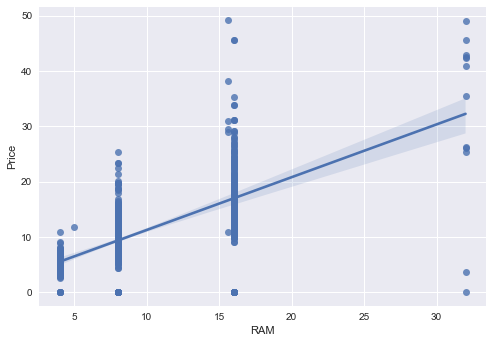

In [11]:
# Plot data and a linear regression model fit
sns.regplot(x = "RAM", y = "Price", data = Laptop_df)

### 2. ssd

In [12]:
# using statsmodels
import statsmodels.api as sm

# predictor & depentent var
X_train = Laptop_df["SSD"]
y_true = Laptop_df["Price"]

# ols model with intercept added to predictor
OLS_sm = sm.OLS(y_true, sm.add_constant(X_train))

# fitted model and summary
OLS_sm_results = OLS_sm.fit()
OLS_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     361.2
Date:                Tue, 10 May 2022   Prob (F-statistic):           1.67e-67
Time:                        11:01:56   Log-Likelihood:                -2754.9
No. Observations:                 861   AIC:                             5514.
Df Residuals:                     859   BIC:                             5523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8091      0.356     16.310      0.000       5.110       6.508
SSD            0.0124      0.001     19.006      0.000       0.011       0.014
==============================================================================
Omnibus:                      281.827   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5344.544
Skew:                           0.988   Prob(JB):                         0.00
Kurtosis:                      15.044   Cond. No.                         960.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='SSD', ylabel='Price'>

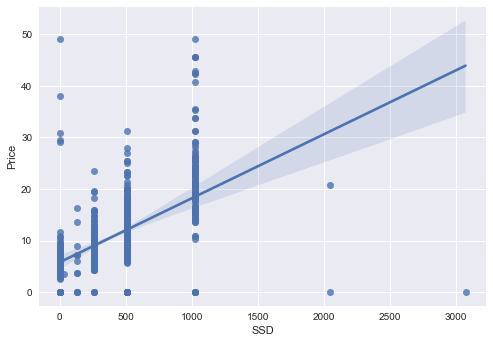

In [13]:
# Plot data and a linear regression model fit
sns.regplot(x = "SSD", y = "Price", data = Laptop_df)

### 3. Graphic_card

In [14]:
# using statsmodels
import statsmodels.api as sm

# predictor & depentent var
X_train = Laptop_df["Graphic_card"]
y_true = Laptop_df["Price"]

# ols model with intercept added to predictor
OLS_sm = sm.OLS(y_true, sm.add_constant(X_train))

# fitted model and summary
OLS_sm_results = OLS_sm.fit()
OLS_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     256.1
Date:                Tue, 10 May 2022   Prob (F-statistic):           1.20e-50
Time:                        11:01:57   Log-Likelihood:                -2793.7
No. Observations:                 861   AIC:                             5591.
Df Residuals:                     859   BIC:                             5601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.4754      0.243     39.012      0.000       8.999       9.952
Graphic_card     1.6995      0.106     16.003      0.000       1.491       1.908
==============================================================================
Omnibus:                      219.071   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              711.174
Skew:                           1.217   Prob(JB):                    3.72e-155
Kurtosis:                       6.728   Cond. No.                         2.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Graphic_card', ylabel='Price'>

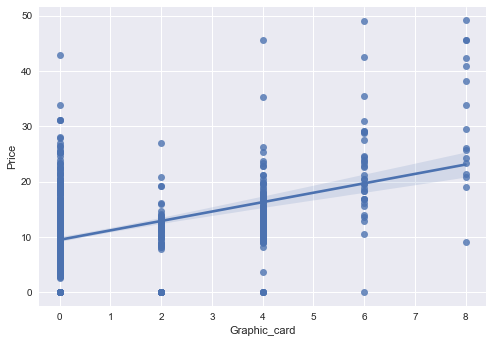

In [15]:
# Plot data and a linear regression model fit
sns.regplot(x = "Graphic_card", y = "Price", data = Laptop_df, order = 1)

Looking at the graph, the Simple Linear model is not suitable here. Also, The RAM's r2_score is less than 0.5, it is a low value. 

## 2.2 Multiple Linear Regression
### 1] Use Quantitative Predictors

Among predictors, I think the SSD and HDD are highly correlated because both are measures of memory, And Other features may also be correlated with each other. So I used a multiple linear regression model to see correlations of the several input. 

#### 1. SSD, HDD
* Include interaction

In [16]:
import statsmodels.formula.api as smf

# OLS model with intercept
OLS_smf_1 = smf.ols(formula = "Price ~ SSD * HDD", data = Laptop_df)

OLS_smf_1_results = OLS_smf_1.fit()
OLS_smf_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     121.4
Date:                Tue, 10 May 2022   Prob (F-statistic):           1.53e-65
Time:                        11:01:57   Log-Likelihood:                -2753.5
No. Observations:                 861   AIC:                             5515.
Df Residuals:                     857   BIC:                             5534.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7256      0.466     12.279      0.000       4.810       6.641
SSD            0.0124      0.001     16.005      0.000       0.011       0.014
HDD           -0.0003      0.001     -0.366      0.714      -0.002       0.001
SSD:HDD     4.953e-06   3.32e-06      1.490      0.137   -1.57e-06    1.15e-05
==============================================================================
Omnibus:                      286.207   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5497.202
Skew:                           1.008   Prob(JB):                         0.00
Kurtosis:                      15.213   Cond. No.                     1.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* According to the table, p-values of both SSD and interaction between SSD and HDD are significant. That is, when they are considered separately, it seems that each of them positively affects Price.
* The p-value of the HDD is too high, so HDD isn't necessarily. But, because of the ***hierarchy principle***, we should also include the HHD.
* The R-squared value is too low, so the datas doesn't fit well in the regression model.
* In the graph, it is difficult to analyze the Multiple Linear Regression.

<br>

cf> hierarchy principle: If we include an interaction in a model, we should also include the main effects, even if the p-values associated with their coefficients are not significant.

#### 1.1. SSD, HDD
* not include interaction

In [17]:
# OLS model with intercept
OLS_smf_1_1 = smf.ols(formula = "Price ~ SSD + HDD", data = Laptop_df)

OLS_smf_1_1_results = OLS_smf_1_1.fit()
OLS_smf_1_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     180.8
Date:                Tue, 10 May 2022   Prob (F-statistic):           3.04e-66
Time:                        11:01:57   Log-Likelihood:                -2754.6
No. Observations:                 861   AIC:                             5515.
Df Residuals:                     858   BIC:                             5530.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5955      0.458     12.207      0.000       4.696       6.495
SSD            0.0127      0.001     16.725      0.000       0.011       0.014
HDD            0.0004      0.001      0.740      0.459      -0.001       0.002
==============================================================================
Omnibus:                      281.756   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5659.307
Skew:                           0.970   Prob(JB):                         0.00
Kurtosis:                      15.409   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Draw 3D-graph
* [code reference link](https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python)

Text(0.5, 0, 'SSD')

Text(0.5, 0.5, 'HHD')

Text(0.5, 0, 'Price')

Text(0.5, 0, 'SSD')

Text(0.5, 0.5, 'HHD')

Text(0.5, 0, 'Price')

Text(0.5, 0, 'SSD')

Text(0.5, 0.5, 'HHD')

Text(0.5, 0, 'Price')

Text(0.5, 0.98, '$R-squared = 0.30$')

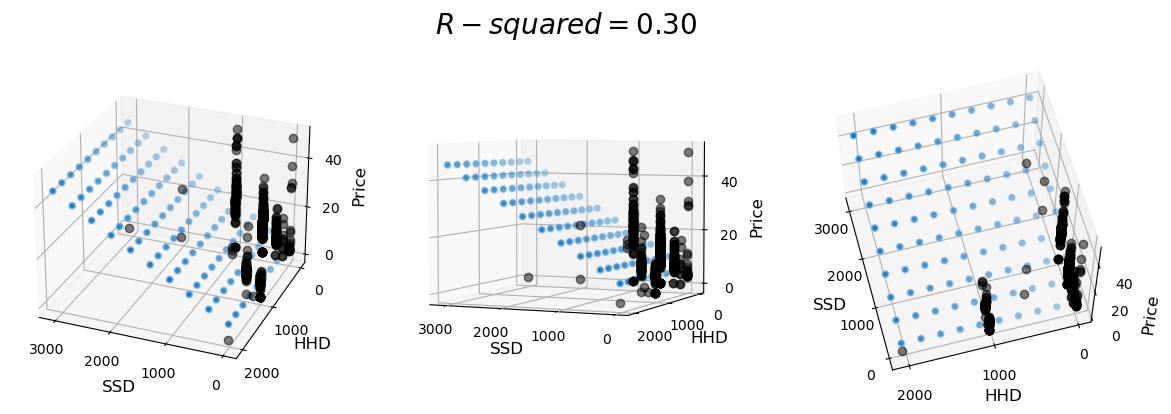

In [18]:
X1 = Laptop_df[["SSD", "HDD"]].values.reshape(-1, 2)
Y1 = Laptop_df["Price"]

x = X1[:, 0] # SSD
y = X1[:, 1] # HDD
z = Y1

x_pred = np.linspace(Laptop_df['SSD'].min(), Laptop_df['SSD'].max(), 10)
y_pred = np.linspace(Laptop_df['HDD'].min(), Laptop_df['HDD'].max(), 10)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
 
OLS = linear_model.LinearRegression()
model = OLS.fit(X1, Y1)
 
predicted = model.predict(model_viz)
 
r2_score = model.score(X1, Y1)
 
plt.style.use('default')
 
fig = plt.figure(figsize = (12, 4))
 
ax1 = fig.add_subplot(131, projection = '3d')
ax2 = fig.add_subplot(132, projection = '3d')
ax3 = fig.add_subplot(133, projection = '3d')
 
axes = [ax1, ax2, ax3]
 
for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5) 
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, s=20, edgecolor='#70b3f0') 
    ax.set_xlabel('SSD', fontsize=12) 
    ax.set_ylabel('HHD', fontsize=12)
    ax.set_zlabel('Price', fontsize=12)
    ax.locator_params(nbins=6, axis='x') 
    ax.locator_params(nbins=4, axis='y')
    ax.locator_params(nbins=4, axis='z')


ax1.view_init(elev = 27, azim = 112) 
ax2.view_init(elev=4, azim = 114)
ax3.view_init(elev=60, azim=165)
 
fig.suptitle('$R-squared = %.2f$' % r2_score, fontsize = 20)
 
fig.tight_layout()

#### 2. RAM, SSD
* Include interaction

In [19]:
import statsmodels.formula.api as smf

# OLS model with intercept
OLS_smf_2 = smf.ols(formula = "Price ~ RAM * SSD", data = Laptop_df)

OLS_smf_2_results = OLS_smf_2.fit()
OLS_smf_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     258.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.97e-119
Time:                        11:01:58   Log-Likelihood:                -2628.6
No. Observations:                 861   AIC:                             5265.
Df Residuals:                     857   BIC:                             5284.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4062      0.607     -0.669      0.504      -1.597       0.785
RAM            0.9095      0.062     14.768      0.000       0.789       1.030
SSD            0.0092      0.001      7.833      0.000       0.007       0.012
RAM:SSD       -0.0003   7.44e-05     -3.891      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      167.692   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2631.709
Skew:                           0.383   Prob(JB):                         0.00
Kurtosis:                      11.531   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the table, the p-values of three features are significant. That is, when they are considered separately, it seems that each of them positively affects Price.
The R-squared value is approximately 0.5, so approximately 50% of the variability in the outcome data cannot be explained by the model. 

#### 2.1 RAM, SSD
* not include interaction

In [20]:
import statsmodels.formula.api as smf

# OLS model with intercept
OLS_smf_2 = smf.ols(formula = "Price ~ RAM + SSD", data = Laptop_df)

OLS_smf_2_results = OLS_smf_2.fit()
OLS_smf_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     374.0
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.62e-117
Time:                        11:01:58   Log-Likelihood:                -2636.1
No. Observations:                 861   AIC:                             5278.
Df Residuals:                     858   BIC:                             5293.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3402      0.412      3.254      0.001       0.532       2.149
RAM            0.7449      0.045     16.508      0.000       0.656       0.833
SSD            0.0055      0.001      7.853      0.000       0.004       0.007
==============================================================================
Omnibus:                      179.414   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5203.934
Skew:                           0.000   Prob(JB):                         0.00
Kurtosis:                      15.044   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Draw 3D-graph
* [code reference link](https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python)

Text(0.5, 0, 'RAM')

Text(0.5, 0.5, 'SSD')

Text(0.5, 0, 'Price')

Text(0.5, 0, 'RAM')

Text(0.5, 0.5, 'SSD')

Text(0.5, 0, 'Price')

Text(0.5, 0, 'RAM')

Text(0.5, 0.5, 'SSD')

Text(0.5, 0, 'Price')

Text(0.5, 0.98, '$R-squared = 0.47$')

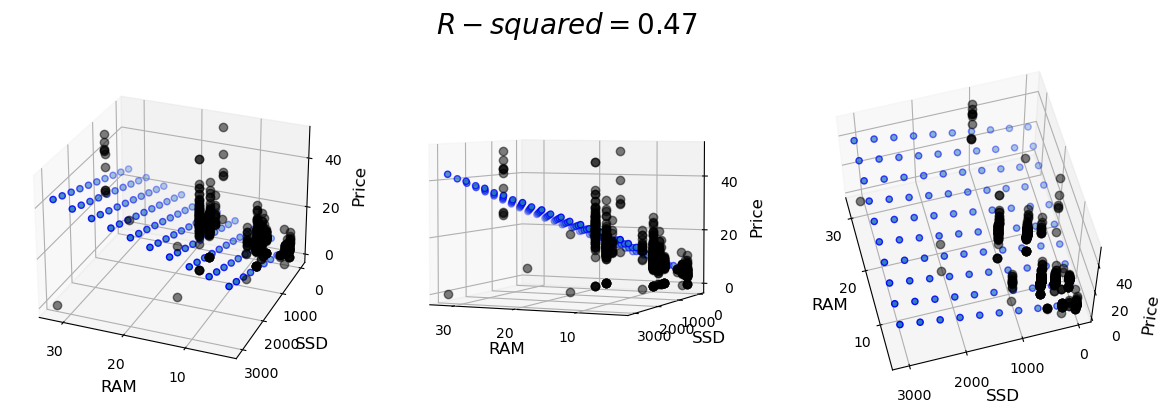

In [21]:
X1 = Laptop_df[["RAM", "SSD"]].values.reshape(-1, 2)
Y1 = Laptop_df["Price"]

x = X1[:, 0] # RAM
y = X1[:, 1] # SSD
z = Y1

x_pred = np.linspace(Laptop_df['RAM'].min(), Laptop_df['RAM'].max(), 10)
y_pred = np.linspace(Laptop_df['SSD'].min(), Laptop_df['SSD'].max(), 10)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
 
OLS = linear_model.LinearRegression()
model = OLS.fit(X1, Y1)
 
predicted = model.predict(model_viz)
 
r2_score = model.score(X1, Y1)
 
plt.style.use('default')
 
fig = plt.figure(figsize = (12, 4))
 
ax1 = fig.add_subplot(131, projection = '3d')
ax2 = fig.add_subplot(132, projection = '3d')
ax3 = fig.add_subplot(133, projection = '3d')
 
axes = [ax1, ax2, ax3]
 
for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5) 
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, s=20, edgecolor='b') 
    ax.set_xlabel('RAM', fontsize=12) 
    ax.set_ylabel('SSD', fontsize=12)
    ax.set_zlabel('Price', fontsize=12)
    ax.locator_params(nbins=6, axis='x') 
    ax.locator_params(nbins=4, axis='y')
    ax.locator_params(nbins=4, axis='z')


ax1.view_init(elev = 27, azim = 112) 
ax2.view_init(elev=4, azim = 114)
ax3.view_init(elev=60, azim=165)
 
fig.suptitle('$R-squared = %.2f$' % r2_score, fontsize = 20)
 
fig.tight_layout()

#### 3. RAM, SSD, Graphic_card

In [22]:
import statsmodels.formula.api as smf

# OLS model with intercept
OLS_smf_3 = smf.ols(formula = "Price ~ RAM * SSD * Graphic_card", data = Laptop_df)

OLS_smf_3_results = OLS_smf_3.fit()
OLS_smf_3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     147.7
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.28e-142
Time:                        11:01:58   Log-Likelihood:                -2564.2
No. Observations:                 861   AIC:                             5144.
Df Residuals:                     853   BIC:                             5183.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.9294      0.791      4.966      0.000       2.376       5.482
RAM                      0.2487      0.093      2.670      0.008       0.066       0.432
SSD                      0.0045      0.002      2.626      0.009       0.001       0.008
RAM:SSD                  0.0004      0.000      2.694      0.007       0.000       0.001
Graphic_card            -0.9195      0.361     -2.545      0.011      -1.629      -0.210
RAM:Graphic_card         0.1947      0.027      7.329      0.000       0.143       0.247
SSD:Graphic_card         0.0010      0.001      2.022      0.043    3.06e-05       0.002
RAM:SSD:Graphic_card    -0.0002   3.23e-05     -5.439      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      151.362   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2188.344
Skew:                          -0.290   Prob(JB):                         0.00
Kurtosis:                      10.789   Cond. No.                     1.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the table, the p-values of the all features are significant. That is, when they are considered separately, it seems that each of them positively affects Price.
The R-squared value is more than 0.5, so approximately 55% of the variability in the outcome data can be explained by the model. 

#### 4. star_rating, ratings

In [23]:
import statsmodels.formula.api as smf

# OLS model with intercept
OLS_smf_4 = smf.ols(formula = "Price ~ star_rating * ratings", data = Laptop_df)

OLS_smf_4_results = OLS_smf_4.fit()
OLS_smf_4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     10.21
Date:                Tue, 10 May 2022   Prob (F-statistic):           1.31e-06
Time:                        11:01:58   Log-Likelihood:                -2890.9
No. Observations:                 861   AIC:                             5790.
Df Residuals:                     857   BIC:                             5809.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.3145      0.428     28.795      0.000      11.475      13.154
star_rating            -0.2233      0.123     -1.810      0.071      -0.466       0.019
ratings                -0.0087      0.003     -3.386      0.001      -0.014      -0.004
star_rating:ratings     0.0019      0.001      3.067      0.002       0.001       0.003
==============================================================================
Omnibus:                      310.472   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1337.020
Skew:                           1.640   Prob(JB):                    4.67e-291
Kurtosis:                       8.149   Cond. No.                     9.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared value is very low. This indicates that the model explains approximately none of the variability of the response data around its mean.

### 2] Use Quantitative and Qualitative Predictors

The representative processor brands are Intel and AMD, which are reflected in these datasets. Most products use Intel or AMD processors, and there are not many that do not. So I chose 'the processor brand' as a qualitative predictor.

In [24]:
# Data filtering
# Remove rows that do not contain Intel or AMD.

processor_list = ["Intel", "AMD"]
join_list = '|'.join(processor_list)

Laptop_df = Laptop_df[Laptop_df["processor_brand"].str.contains(join_list)]

Laptop_df.head(10) # test.

,brand,model,processor_brand,processor_name,Touchscreen,msoffice,weight,RAM,SSD,HDD,Graphic_card,display_size,star_rating,ratings,reviews,Price
0,ASUS,Celeron,Intel,Celeron Dual,No,No,Casual,4.00,0,1024,0,15.60,3.80,15279,1947,3.51
1,ASUS,VivoBook,Intel,Core i3,No,No,Casual,8.00,512,0,0,15.60,4.30,990,108,6.63
2,ASUS,Vivobook,Intel,Core i3,No,No,Casual,8.00,0,1024,0,14.10,3.90,28,4,6.11
3,HP,Core,Intel,Core i3,No,Yes,ThinNlight,8.00,512,0,0,15.60,4.40,158,18,7.45
4,HP,Core,Intel,Core i5,No,No,ThinNlight,8.00,512,0,0,15.60,4.20,116,15,9.12
5,Lenovo,IdeaPad,Intel,Core i3,No,Yes,ThinNlight,8.00,0,1024,0,15.60,4.00,2124,233,7.45
6,HP,15s,AMD,Ryzen 3,No,Yes,Casual,8.00,256,1024,0,15.60,4.30,3524,432,6.28
7,ASUS,Core,Intel,Core i3,No,No,ThinNlight,4.00,256,0,0,14.00,4.10,37,6,6.50
8,DELL,Vostro,Intel,Core i3,No,Yes,ThinNlight,8.00,256,1024,0,15.60,5.00,7,5,7.12
9,Lenovo,IdeaPad,Intel,Core i3,No,Yes,ThinNlight,8.00,256,0,0,15.60,4.30,2080,235,7.54


In [25]:
# See the number of rows
print("The number of rows :", len(Laptop_df))

The number of rows : 827


In [26]:
def ols_formula(df, dependent_var, *excluded_cols):
    """
    Generates the R style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns 
    as strings
    """
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

#### 1. Using a dummy variable: processor_brand

In [27]:
# use three variables: processor_brand(qualitative), SSD.HDD(quantitative)

# add synergy term: SSD:HDD, RAM:Graphic_card
form = ols_formula(Laptop_df, "Price", "brand", "model", "processor_brand", "processor_name",
                  "weight", "Touchscreen", "msoffice", "RAM",
                  "Graphic_card", "display_size", "star_rating",
                  "ratings", "reviews") + " + SSD:HDD + C(processor_brand) "
ols_smf = smf.ols(formula = form, data = Laptop_df)

# fitted model and summary
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     117.0
Date:                Tue, 10 May 2022   Prob (F-statistic):           5.28e-79
Time:                        11:01:58   Log-Likelihood:                -2547.2
No. Observations:                 827   AIC:                             5104.
Df Residuals:                     822   BIC:                             5128.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       4.1658      0.573      7.269      0.000       3.041       5.291
C(processor_brand)[T.Intel]     0.5802      0.433      1.341      0.180      -0.269       1.429
SSD                             0.0136      0.001     18.673      0.000       0.012       0.015
HDD                             0.0007      0.001      1.100      0.272      -0.001       0.002
SSD:HDD                      4.055e-06   2.96e-06      1.369      0.171   -1.76e-06    9.87e-06
==============================================================================
Omnibus:                      191.024   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6845.787
Skew:                          -0.169   Prob(JB):                         0.00
Kurtosis:                      17.091   Cond. No.                     3.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Erase qualitative predictors
# add synergy term: SSD:HDD, RAM:Graphic_card
form = ols_formula(Laptop_df, "Price", "brand", "model", "processor_brand", "processor_name",
                  "weight", "Touchscreen", "msoffice") + " + SSD:HDD \
                    + RAM:Graphic_card + C(processor_brand) "
ols_smf = smf.ols(formula = form, data = Laptop_df)

# fitted model and summary
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     82.91
Date:                Tue, 10 May 2022   Prob (F-statistic):          7.88e-125
Time:                        11:01:58   Log-Likelihood:                -2423.0
No. Observations:                 827   AIC:                             4870.
Df Residuals:                     815   BIC:                             4927.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.5752      1.115      3.206      0.001       1.387       5.764
C(processor_brand)[T.Intel]     0.6920      0.376      1.842      0.066      -0.046       1.430
RAM                             0.4772      0.054      8.904      0.000       0.372       0.582
SSD                             0.0057      0.001      6.935      0.000       0.004       0.007
HDD                            -0.0007      0.001     -1.140      0.255      -0.002       0.001
Graphic_card                    0.3770      0.203      1.861      0.063      -0.021       0.775
display_size                   -0.0556      0.070     -0.789      0.430      -0.194       0.083
star_rating                    -0.1361      0.083     -1.633      0.103      -0.300       0.028
ratings                         0.0005      0.001      0.469      0.639      -0.002       0.002
reviews                        -0.0051      0.008     -0.633      0.527      -0.021       0.011
SSD:HDD                      4.754e-06   2.59e-06      1.834      0.067   -3.34e-07    9.84e-06
RAM:Graphic_card                0.0253      0.014      1.872      0.062      -0.001       0.052
==============================================================================
Omnibus:                      316.592   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7179.462
Skew:                          -1.186   Prob(JB):                         0.00
Kurtosis:                      17.238   Cond. No.                     6.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The 𝑝-values associated with RAM, SSD, Graphic_card and the interaction term SSD*HDD, RAM:Graphic_card, and the dummy variable for processor_brand status are very small, indicating that each of these variables is associated with the probability of the Price.
* The p-value of star_rating is somewhat small, but it had a negative coefficient. So, for a fixed price value, the star_rating is less likely to estimate.

#### Using two dummy variables: processor_brand, weight

In [29]:
# Erase qualitative predictors
# add synergy term: SSD:HDD, RAM:Graphic_card
form = ols_formula(Laptop_df, "Price", "brand", "model", "processor_brand", "processor_name",
                  "weight", "Touchscreen", "msoffice") + " + SSD:HDD \
                    + RAM:Graphic_card + C(processor_brand) + C(weight) "
ols_smf = smf.ols(formula = form, data = Laptop_df)

# fitted model and summary
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     70.96
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.43e-124
Time:                        11:01:59   Log-Likelihood:                -2420.0
No. Observations:                 827   AIC:                             4868.
Df Residuals:                     813   BIC:                             4934.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.6136      1.117      3.236      0.001       1.422       5.806
C(processor_brand)[T.Intel]     0.7136      0.375      1.903      0.057      -0.022       1.450
C(weight)[T.Gaming]            -0.5728      0.836     -0.685      0.493      -2.214       1.068
C(weight)[T.ThinNlight]        -0.8831      0.372     -2.372      0.018      -1.614      -0.152
RAM                             0.4674      0.054      8.697      0.000       0.362       0.573
SSD                             0.0056      0.001      6.797      0.000       0.004       0.007
HDD                            -0.0009      0.001     -1.439      0.151      -0.002       0.000
Graphic_card                    0.2852      0.224      1.272      0.204      -0.155       0.725
display_size                   -0.0216      0.072     -0.302      0.763      -0.162       0.119
star_rating                    -0.1246      0.084     -1.487      0.137      -0.289       0.040
ratings                         0.0006      0.001      0.572      0.567      -0.001       0.003
reviews                        -0.0058      0.008     -0.719      0.472      -0.022       0.010
SSD:HDD                      5.084e-06   2.59e-06      1.960      0.050   -8.67e-09    1.02e-05
RAM:Graphic_card                0.0275      0.014      1.971      0.049       0.000       0.055
==============================================================================
Omnibus:                      321.638   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7401.277
Skew:                          -1.209   Prob(JB):                         0.00
Kurtosis:                      17.455   Cond. No.                     6.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Using three dummy variables: processor_brand, weight, Touchscreen

In [30]:
# Erase qualitative predictors
# add synergy term: SSD:HDD, RAM:Graphic_card
form = ols_formula(Laptop_df, "Price", "brand", "model", "processor_brand", "processor_name",
                  "weight", "Touchscreen", "msoffice") + " + SSD:HDD \
                    + RAM:Graphic_card + C(processor_brand) + C(weight) + C(Touchscreen) "
ols_smf = smf.ols(formula = form, data = Laptop_df)

# fitted model and summary
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     69.28
Date:                Tue, 10 May 2022   Prob (F-statistic):          4.56e-128
Time:                        11:01:59   Log-Likelihood:                -2408.6
No. Observations:                 827   AIC:                             4847.
Df Residuals:                     812   BIC:                             4918.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.3432      1.104      3.029      0.003       1.177       5.509
C(processor_brand)[T.Intel]     0.6222      0.371      1.679      0.094      -0.105       1.349
C(weight)[T.Gaming]            -0.4874      0.825     -0.591      0.555      -2.107       1.133
C(weight)[T.ThinNlight]        -0.4307      0.379     -1.135      0.257      -1.176       0.314
C(Touchscreen)[T.Yes]           2.5001      0.524      4.770      0.000       1.471       3.529
RAM                             0.4127      0.054      7.605      0.000       0.306       0.519
SSD                             0.0055      0.001      6.825      0.000       0.004       0.007
HDD                            -0.0006      0.001     -1.044      0.297      -0.002       0.001
Graphic_card                    0.3942      0.222      1.772      0.077      -0.042       0.831
display_size                   -0.0041      0.071     -0.058      0.954      -0.143       0.135
star_rating                    -0.1372      0.083     -1.659      0.098      -0.300       0.025
ratings                         0.0005      0.001      0.473      0.636      -0.002       0.002
reviews                        -0.0046      0.008     -0.582      0.561      -0.020       0.011
SSD:HDD                      5.056e-06   2.56e-06      1.975      0.049    3.02e-08    1.01e-05
RAM:Graphic_card                0.0298      0.014      2.164      0.031       0.003       0.057
==============================================================================
Omnibus:                      317.435   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7305.090
Skew:                          -1.186   Prob(JB):                         0.00
Kurtosis:                      17.366   Cond. No.                     6.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Using four dummy variables: processor_brand, weight, Touchscreen, msoffice

In [31]:
# Erase qualitative predictors
# add synergy term: SSD:HDD, RAM:Graphic_card
form = ols_formula(Laptop_df, "Price", "brand", "model", "processor_brand", "processor_name",
                  "weight", "Touchscreen", "msoffice") + " + SSD:HDD \
                    + RAM:Graphic_card + C(processor_brand) + C(weight) + C(Touchscreen) \
                    + C(msoffice)"
ols_smf = smf.ols(formula = form, data = Laptop_df)

# fitted model and summary
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     64.59
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.71e-127
Time:                        11:01:59   Log-Likelihood:                -2408.5
No. Observations:                 827   AIC:                             4849.
Df Residuals:                     811   BIC:                             4925.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.3289      1.105      3.012      0.003       1.159       5.498
C(processor_brand)[T.Intel]     0.6201      0.371      1.672      0.095      -0.108       1.348
C(weight)[T.Gaming]            -0.4824      0.826     -0.584      0.559      -2.104       1.139
C(weight)[T.ThinNlight]        -0.4173      0.382     -1.091      0.276      -1.168       0.333
C(Touchscreen)[T.Yes]           2.5240      0.531      4.756      0.000       1.482       3.566
C(msoffice)[T.Yes]             -0.1019      0.347     -0.293      0.769      -0.783       0.580
RAM                             0.4137      0.054      7.604      0.000       0.307       0.520
SSD                             0.0055      0.001      6.826      0.000       0.004       0.007
HDD                            -0.0007      0.001     -1.053      0.293      -0.002       0.001
Graphic_card                    0.3934      0.223      1.768      0.078      -0.043       0.830
display_size                   -0.0027      0.071     -0.039      0.969      -0.142       0.137
star_rating                    -0.1324      0.084     -1.568      0.117      -0.298       0.033
ratings                         0.0005      0.001      0.489      0.625      -0.001       0.002
reviews                        -0.0048      0.008     -0.596      0.552      -0.020       0.011
SSD:HDD                      5.082e-06   2.56e-06      1.982      0.048    5.01e-08    1.01e-05
RAM:Graphic_card                0.0297      0.014      2.152      0.032       0.003       0.057
==============================================================================
Omnibus:                      318.586   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7364.342
Skew:                          -1.191   Prob(JB):                         0.00
Kurtosis:                      17.424   Cond. No.                     6.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3. Resampling methods

Why do we estimate the test error? Measure the test error is one of the essential issues. For example, when we use a Polynomial Regression, it is crucial to set the degree of the function, which is called a hyperparameter tuning. First, the kernel function must be determined before the Regression can be applied. In the kernel function itself, there will be each test error when the degree is 1, 2, 3, etc. Among them, it would be better to set the smallest test error value to degree. In this respect, measuring the test error is also an important issue.

In [32]:
Laptop_df_re = Laptop_df.copy() # dataset copy to use resampling methods

# Because the RAM is the most correlated with the Price, 
# I choose the RAM as a predictor.
Laptop_df_re["RAM_2"] = np.power(Laptop_df_re.RAM, 2)
Laptop_df_re["RAM_3"] = np.power(Laptop_df_re.RAM, 3)
Laptop_df_re["RAM_4"] = np.power(Laptop_df_re.RAM, 4)
Laptop_df_re["RAM_5"] = np.power(Laptop_df_re.RAM, 5)

from sklearn.preprocessing import PolynomialFeatures

pol = PolynomialFeatures(degree = 5, interaction_only = False, include_bias = False)
polf = pol.fit_transform(Laptop_df_re.loc[:, 'RAM'].values.reshape(-1, 1))

### 1] Validation Set Approach

In [33]:
from sklearn.model_selection import train_test_split

X, y = Laptop_df_re.loc[:, ["RAM", "RAM_2", "RAM_3", "RAM_4", "RAM_5"]], Laptop_df_re.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

I set the test size to 0.5. This means, half of the data used the training set and the rest are used the validation set. Moreover, the resulting validation-set error provides an estimate of the test error, so I used MSE to estimate the actual test error.   

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# OLS model with intercept
LM1 = LinearRegression(fit_intercept = True)
LM2 = LinearRegression(fit_intercept = True)
LM3 = LinearRegression(fit_intercept = True)
LM4 = LinearRegression(fit_intercept = True)
LM5 = LinearRegression(fit_intercept = True)

LM1_fit = LM1.fit(X_train.loc[:, "RAM"].values.reshape(-1, 1), y_train)
LM2_fit = LM2.fit(X_train.loc[:, ["RAM", "RAM_2"]], y_train)
LM3_fit = LM3.fit(X_train.loc[:, ["RAM", "RAM_2", "RAM_3"]], y_train)
LM4_fit = LM4.fit(X_train.loc[:, ["RAM", "RAM_2", "RAM_3", "RAM_4"]], y_train)
LM5_fit = LM5.fit(X_train.loc[:, ["RAM", "RAM_2", "RAM_3", "RAM_4", "RAM_5"]], y_train)

LM1_predict = LM1_fit.predict(X_test.loc[:, "RAM"].values.reshape(-1, 1))
LM2_predict = LM2_fit.predict(X_test.loc[:, ["RAM", "RAM_2"]])
LM3_predict = LM3_fit.predict(X_test.loc[:, ["RAM", "RAM_2", "RAM_3"]])
LM4_predict = LM4_fit.predict(X_test.loc[:, ["RAM", "RAM_2", "RAM_3", "RAM_4"]])
LM5_predict = LM5_fit.predict(X_test.loc[:, ["RAM", "RAM_2", "RAM_3", "RAM_4", "RAM_5"]])


print("Linear Model 1, MSE:", mean_squared_error(y_test, LM1_predict))
print("Linear Model 2, MSE:", mean_squared_error(y_test, LM2_predict))
print("Linear Model 3, MSE:", mean_squared_error(y_test, LM3_predict))
print("Linear Model 4, MSE:", mean_squared_error(y_test, LM4_predict))
print("Linear Model 5, MSE:", mean_squared_error(y_test, LM5_predict))


Linear Model 1, MSE: 23.51135895528877
Linear Model 2, MSE: 24.95277292873239
Linear Model 3, MSE: 25.106013957148836
Linear Model 4, MSE: 25.098484858155253
Linear Model 5, MSE: 25.098484837886


**The result is that the Polynomial Regression which degree is one is enough.**

### 2. Leave-One-Out Cross-Validation(LOOCV)

In [35]:
from sklearn.model_selection import LeaveOneOut

X, y = Laptop_df_re.loc[:, ["RAM", "RAM_2", "RAM_3", "RAM_4", "RAM_5"]], Laptop_df_re.Price

LOOCV = LeaveOneOut() # Return the number of splitting iterations in the cross-validator
numOfRows = LOOCV.get_n_splits(X)


print("Each column of Laptop_df_re has " + str(numOfRows) + " elements")

Each column of Laptop_df_re has 827 elements


In [36]:
# Loop for 5 degree polynomial Linear Regressions with LOOCV

LOOCV_polynomial = {}

for i in range(1, 6):
    LOOCV_MSE = []
    
    for train_index, test_index in LOOCV.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
    if i == 1:
        X_TRAIN = X_train.iloc[:, 0:1].values.reshape(-1, 1)
        X_TEST = X_test.iloc[:, 0:1].values.reshape(-1, 1)
    else:
        X_TRAIN = X_train.iloc[:, 0:i]
        X_TEST = X_test.iloc[:, 0:i]
        
    LOOCV_MSE.append(mean_squared_error(y_test,
                                       LinearRegression(fit_intercept = True)
                                       .fit(
                                           X_TRAIN, 
                                       y_train
                                       )
                                       .predict(
                                       X_TEST)
                                       )
                                    )
    LOOCV_polynomial['lm' + str(i) + '_MSE'] = np.array(LOOCV_MSE).mean()
    
for key, value in LOOCV_polynomial.items():
    print(key,"=", value)
    

lm1_MSE = 0.022136745511520173
lm2_MSE = 0.04757180006497249
lm3_MSE = 0.23964284799604896
lm4_MSE = 0.2780833680495323
lm5_MSE = 0.2780833641263575


The advantage of LOOCV is that it is trained from 826 columns so that the bias can be reduced than the Validation Set Approach.   
And the result is the same as the Validation Set Approach. The degree one is enough.

### 3. K-Fold Cross-Validation

k = 5 or k = 10 provides a good compromise for this bias-variance tradeoff, so I did both 5 and 10. 

In [37]:
from sklearn.model_selection import KFold

X, y = Laptop_df_re.loc[:, ["RAM", "RAM_2", "RAM_3", "RAM_4", "RAM_5"]], Laptop_df_re.Price

kfold_5 = KFold(n_splits = 5, shuffle = True, random_state = 33) # n_splits: number of folds
kfold_10 = KFold(n_splits = 10, shuffle = True, random_state = 33)

In [38]:
# Loop for 5 degree polynomial Linear Regressions with K-Fold CV 
# k = 5

kf_polynomial = {}

for i in range(1, 6):
    kf_mse = []
    
    for train_index, test_index in kfold_5.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
    if i == 1:
        X_TRAIN = X_train.iloc[:, 0:1].values.reshape(-1, 1)
        X_TEST = X_test.iloc[:, 0:1].values.reshape(-1, 1)
    else:
        X_TRAIN = X_train.iloc[:, 0:i]
        X_TEST = X_test.iloc[:, 0:i]
        
    kf_mse.append(mean_squared_error(y_test,
                                       LinearRegression(fit_intercept = True)
                                       .fit(X_TRAIN, y_train)
                                       .predict(X_TEST))
                                    )
    kf_polynomial['lm' + str(i) + '_MSE'] = np.array(kf_mse).mean()
    
kf_polynomial

{'lm1_MSE': 20.437848909748485,
 'lm2_MSE': 20.55131897880513,
 'lm3_MSE': 20.517183218034592,
 'lm4_MSE': 20.52634821204599,
 'lm5_MSE': 20.53900552731615}

In [39]:
# Loop for 5 degree polynomial Linear Regressions with K-Fold CV 
# k = 10

kf_polynomial = {}

for i in range(1, 6):
    kf_mse = []
    
    for train_index, test_index in kfold_10.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
    if i == 1:
        X_TRAIN = X_train.iloc[:, 0:1].values.reshape(-1, 1)
        X_TEST = X_test.iloc[:, 0:1].values.reshape(-1, 1)
    else:
        X_TRAIN = X_train.iloc[:, 0:i]
        X_TEST = X_test.iloc[:, 0:i]
        
    kf_mse.append(mean_squared_error(y_test,
                                       LinearRegression(fit_intercept = True)
                                       .fit(X_TRAIN, y_train)
                                       .predict(X_TEST))
                                    )
    kf_polynomial['lm' + str(i) + '_MSE'] = np.array(kf_mse).mean()
    
kf_polynomial

{'lm1_MSE': 23.878698780760324,
 'lm2_MSE': 24.34139683599557,
 'lm3_MSE': 24.30114330787115,
 'lm4_MSE': 24.320220352531624,
 'lm5_MSE': 24.346282172610287}

When the value of k is 5 and 10, the result was the same. The Polynomial Regression| which degree is one is enough.

The three methods, Approach Set Validation, LOOCV, and k-Fold Cross Validation give the same result that to predict the Laptop price by using predictor RAM in the Polynomial Regression, degree one is enough.

## 4. LinearModel Selection and Regularization

In [40]:
Laptop_df_reg = Laptop_df.copy() # dataset copy to use regularization

# Convert categorical variable into dummy variables
Laptop_df_reg = Laptop_df.drop(["brand", "model", "processor_name"], axis = 1, inplace = False)

Laptop_df_reg['processor_brand'] = pd.get_dummies(Laptop_df_reg['processor_brand']).iloc[:, 0]
Laptop_df_reg['Touchscreen'] = pd.get_dummies(Laptop_df_reg['processor_brand']).iloc[:, 0]
Laptop_df_reg['msoffice'] = pd.get_dummies(Laptop_df_reg['msoffice']).iloc[:, 0]
Laptop_df_reg['weight'] = pd.get_dummies(Laptop_df_reg['weight']).iloc[:, 0]

Laptop_df_reg.head(10) # test

,processor_brand,Touchscreen,msoffice,weight,RAM,SSD,HDD,Graphic_card,display_size,star_rating,ratings,reviews,Price
0,0,1,1,1,4.00,0,1024,0,15.60,3.80,15279,1947,3.51
1,0,1,1,1,8.00,512,0,0,15.60,4.30,990,108,6.63
2,0,1,1,1,8.00,0,1024,0,14.10,3.90,28,4,6.11
3,0,1,0,0,8.00,512,0,0,15.60,4.40,158,18,7.45
4,0,1,1,0,8.00,512,0,0,15.60,4.20,116,15,9.12
5,0,1,0,0,8.00,0,1024,0,15.60,4.00,2124,233,7.45
6,1,0,0,1,8.00,256,1024,0,15.60,4.30,3524,432,6.28
7,0,1,1,0,4.00,256,0,0,14.00,4.10,37,6,6.50
8,0,1,0,0,8.00,256,1024,0,15.60,5.00,7,5,7.12
9,0,1,0,0,8.00,256,0,0,15.60,4.30,2080,235,7.54


In [41]:
X = Laptop_df_reg.iloc[:, 1: 12]
y = Laptop_df_reg.iloc[:, 12]

### 4.1 Implement Forward and Backward Stepwise Selection: based on training data

* Forward and Backward Stepwise Selection provides an efficient alternative to the Best Subset Selection
* An enormous search space in the Best Subset Selection can lead to overfitting and high variable estimates. Therefore, the test error can be increased
* But, the two stepwise methods are not guaranteed to find the best possible model

In [42]:
from itertools import chain, combinations # Functions creating iterators for efficient 

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    RSS = regr.ssr
    return {"model" : regr, "RSS" : RSS} # Output: Regression model and RSS


def forward(predictors):
    
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors + [p])) # Linear Regression
        
    # wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the Lowest RSS(minimizing RSS)
    best_model = models.loc[models["RSS"].argmin()] 
    
    # Return the best model, along with some other useful information about the model
    return best_model


def backward(predictors):
    
    results = []
    
    for combo in combinations(predictors, len(predictors) - 1):
        results.append(processSubset(combo))
        
    # wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the Lowest RSS(minimizing RSS)
    best_model = models.loc[models["RSS"].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

### Run Forward Stepwise Selection

In [43]:
models2 = pd.DataFrame(columns = ["RSS", "model"])

predictors = []

for i in range(1, len(X.columns) + 1):
    models2.loc[i] = forward(predictors)
    predictors = models2.loc[i]["model"].model.exog_names
    
bic_f = []

for m in models2.model:
    bic_f.append(m.bic)
    
np.array(bic_f).argmin()

4

In [44]:
predictors, bic_f

(['RAM',
  'SSD',
  'Graphic_card',
  'Touchscreen',
  'weight',
  'display_size',
  'star_rating',
  'reviews',
  'HDD',
  'ratings',
  'msoffice'],
 [5041.715284621624,
  4946.228966391631,
  4914.20050727932,
  4893.763605618674,
  4889.30722507216,
  4893.930963299633,
  4899.484589546389,
  4905.585231229132,
  4912.196002603444,
  4918.793373815739,
  4925.474051517933])

### Run Backward Stepwise Selection

In [45]:
models3 = pd.DataFrame(columns = ["RSS", "model"], index = range(1, len(X.columns)))

predictors = X.columns

while(len(predictors) > 1):
    models3.loc[len(predictors) - 1] = backward(predictors)
    predictors = models3.loc[len(predictors) -1]["model"].model.exog_names
    
bic_b = []

for m in models3.model:
    bic_b.append(m.bic)
    
np.array(bic_b).argmin()

4

In [46]:
predictors, bic_b

(['RAM'],
 [5041.715284621624,
  4946.228966391631,
  4914.20050727932,
  4893.763605618674,
  4889.30722507216,
  4893.930963299633,
  4899.484589546389,
  4905.585231229132,
  4912.196002603444,
  4918.793373815739])

In both methods, the results are almost identical.

### Forward Stepwise Selection using the Validaiton Set Approach

* We can directly estimate the <span style="color:red">test error</span>, using the Validation Set Approach.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_train_05, X_test_05, y_train_05, y_test_05 = train_test_split(X,y,test_size=0.5,random_state=3)
X_train_06, X_test_04, y_train_06, y_test_04 = train_test_split(X,y,test_size=0.4,random_state=3)
X_train_07, X_test_03, y_train_07, y_test_03 = train_test_split(X,y,test_size=0.3,random_state=3)
X_train_08, X_test_02, y_train_08, y_test_02 = train_test_split(X,y,test_size=0.2,random_state=3)
X_train_09, X_test_01, y_train_09, y_test_01 = train_test_split(X,y,test_size=0.1,random_state=3)

In [48]:
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    
    # Fit model one feature_set and calculate RSS
    model = sm.OLS(y_train, X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    
    return {"model" : regr, "RSS" : RSS}

def forward(predictors, X_train, y_train, X_test, y_test):
    
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors + [p], X_train, y_train, 
                                    X_test, y_test))
        
    # wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the Lowest RSS
    best_model = models.loc[models["RSS"].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

Text(0.5, 1.0, 'test size: 0.5')

Text(0.5, 0, '# Predictors')

Text(0, 0.5, 'RSS')

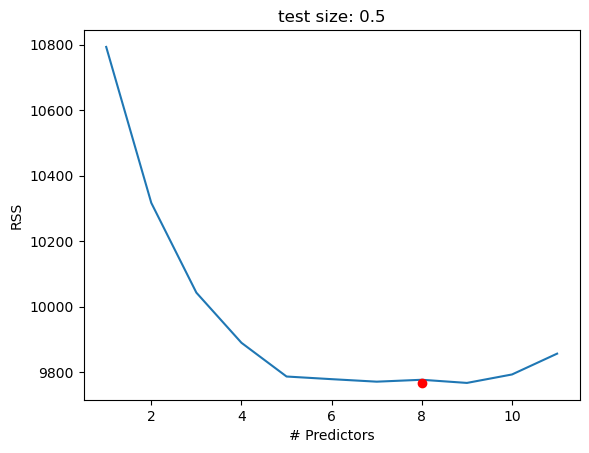

In [49]:
models_train = pd.DataFrame(columns = ["RSS", "model"])

predictors = []

for i in range(1, len(X.columns) + 1):
    models_train.loc[i] = forward(predictors, X_train_05, y_train_05, X_test_05, y_test_05)
    predictors = models_train.loc[i]["model"].model.exog_names
    
plt.title("test size: 0.5")
plt.plot(models_train["RSS"])
plt.xlabel("# Predictors")
plt.ylabel("RSS")
plt.plot(models_train["RSS"].argmin(), models_train["RSS"].min(), 'or')  

Text(0.5, 1.0, 'test size: 0.4')

Text(0.5, 0, '# Predictors')

Text(0, 0.5, 'RSS')

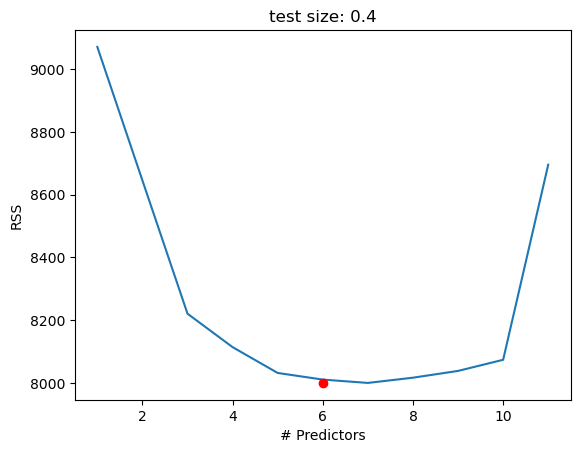

In [50]:
models_train = pd.DataFrame(columns = ["RSS", "model"])

predictors = []

for i in range(1, len(X.columns) + 1):
    models_train.loc[i] = forward(predictors, X_train_06, y_train_06, X_test_04, y_test_04)
    predictors = models_train.loc[i]["model"].model.exog_names
    
plt.title("test size: 0.4")
plt.plot(models_train["RSS"])
plt.xlabel("# Predictors")
plt.ylabel("RSS")
plt.plot(models_train["RSS"].argmin(), models_train["RSS"].min(), 'or')

Text(0.5, 1.0, 'test size: 0.3')

Text(0.5, 0, '# Predictors')

Text(0, 0.5, 'RSS')

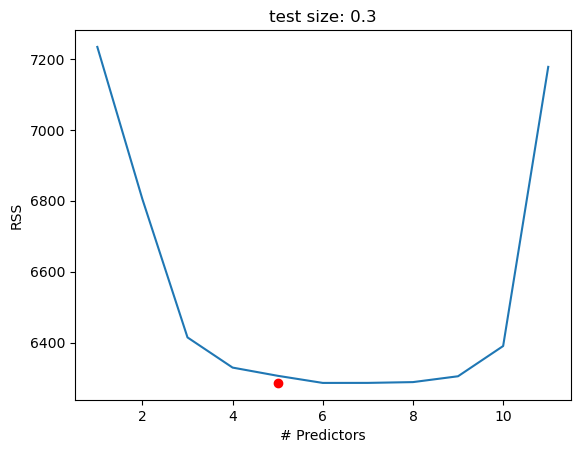

In [51]:
models_train = pd.DataFrame(columns = ["RSS", "model"])

predictors = []

for i in range(1, len(X.columns) + 1):
    models_train.loc[i] = forward(predictors, X_train_07, y_train_07, X_test_03, y_test_03)
    predictors = models_train.loc[i]["model"].model.exog_names
    
plt.title("test size: 0.3")
plt.plot(models_train["RSS"])
plt.xlabel("# Predictors")
plt.ylabel("RSS")
plt.plot(models_train["RSS"].argmin(), models_train["RSS"].min(), 'or')

Text(0.5, 1.0, 'test size: 0.2')

Text(0.5, 0, '# Predictors')

Text(0, 0.5, 'RSS')

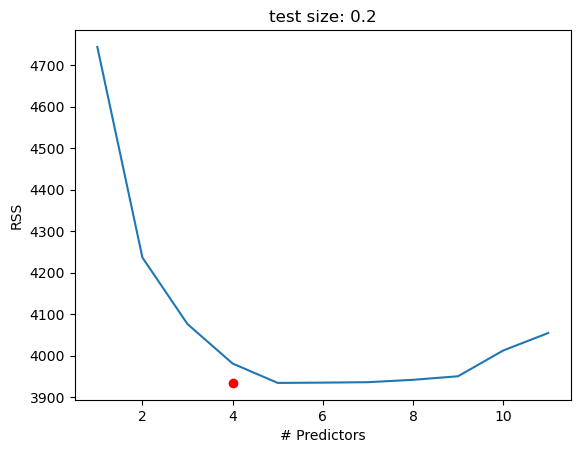

In [52]:
models_train = pd.DataFrame(columns = ["RSS", "model"])

predictors = []

for i in range(1, len(X.columns) + 1):
    models_train.loc[i] = forward(predictors, X_train_08, y_train_08, X_test_02, y_test_02)
    predictors = models_train.loc[i]["model"].model.exog_names
    
plt.title("test size: 0.2")
plt.plot(models_train["RSS"])
plt.xlabel("# Predictors")
plt.ylabel("RSS")
plt.plot(models_train["RSS"].argmin(), models_train["RSS"].min(), 'or')

Text(0.5, 1.0, 'test size: 0.1')

Text(0.5, 0, '# Predictors')

Text(0, 0.5, 'RSS')

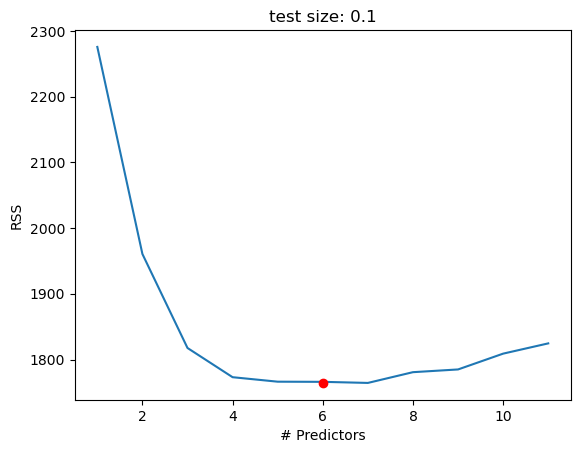

In [53]:
models_train = pd.DataFrame(columns = ["RSS", "model"])

predictors = []

for i in range(1, len(X.columns) + 1):
    models_train.loc[i] = forward(predictors, X_train_09, y_train_09, X_test_01, y_test_01)
    predictors = models_train.loc[i]["model"].model.exog_names
    
plt.title("test size: 0.1")
plt.plot(models_train["RSS"])
plt.xlabel("# Predictors")
plt.ylabel("RSS")
plt.plot(models_train["RSS"].argmin(), models_train["RSS"].min(), 'or')

I tired the Validation Set Approach while decreasing the test size by 0.1 from 0.5 to 0.1. 

그 결과, test size가 감소할수록 model size k가 감소하였고, test size가 0.2일 때 k가 최솟값을 가졌다. k가 작다는 의미는, predictor의 개수가 적다는 것이고 이는 model을 fitting할 때 훨씬 더 수월하다는 것을 의미한다.
따라서, 이 결과에서는, test size를 0.2로 설정하는 것이 좋으며, 0.1인 경우에 overfitting이 발생해서 bias-variance tradeoff에 의해서 k값이 증가한 것으로 보인다.

추가적인 내용은 책 보고 참고하기
In the past, performing cross-validation was computationally prohibitive
for many problems with large p and/or large n, and so AIC, BIC, Cp,
and adjusted R2 were more attractive approaches for choosing among a
set of models. However, nowadays with fast computers, the computations
required to perform cross-validation are hardly ever an issue. Thus, crossvalidation is a very attractive approach for selecting from among a number
of models under consideration


 The rationale here is that
if a set of models appear to be more or less equally good, then we might
as well choose the simplest model—that is, the model with the smallest
number of predictors. In this case, applying the one-standard-error rule
to the validation set or cross-validation approach leads to selection of the
three-variable model

aic, bic, lasso 참고 링크
https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html